# Population Data Analysis: A Story of Growth and Decline

## Business Understanding
Population data is critical for governments, businesses, and organizations to make informed decisions about resource allocation, urban planning, healthcare, education, and economic development. In this project, I will analyze global population trends to answer key questions:
- Which countries/regions are experiencing rapid population growth or decline?
- What are the implications of these trends for resource allocation, infrastructure, and economic planning?
- Can I identify patterns that help predict future population changes?

My goal is to provide actionable insights for stakeholders to make data-driven decisions.

## Data Collection and Preparation
Before diving into analysis, I need to ensure the data is clean, complete, and ready for exploration. Let's load the dataset and inspect it.

In [3]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('population_data.csv')

# Inspect the data
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset information:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

First 5 rows of the dataset:
                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130072080.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2014         2015         2016     

## Exploratory Data Analysis (EDA)
Let's explore the data to uncover initial trends and patterns.

### Global Population Trends
I'll start by calculating the total global population over time.

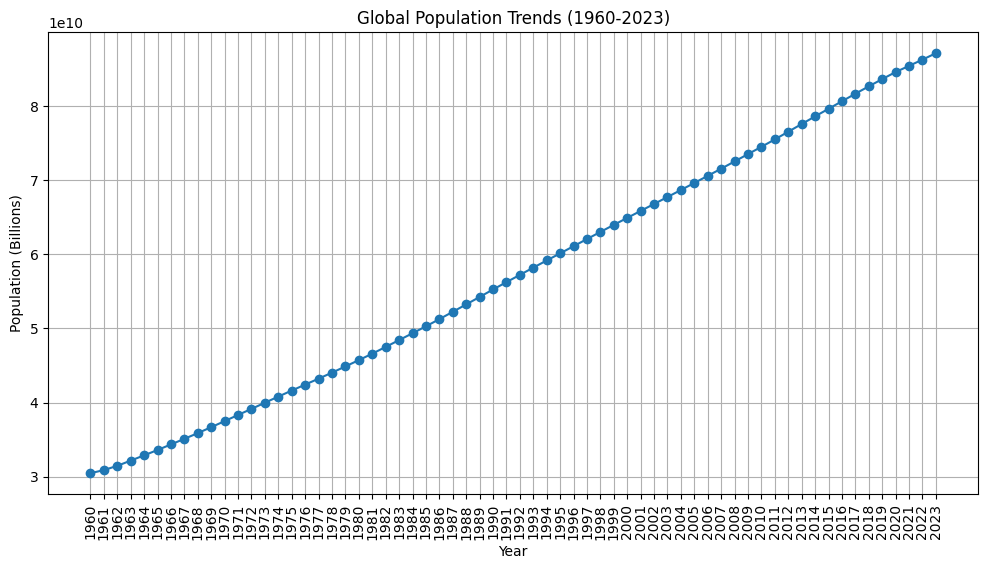

In [5]:
# Calculate global population for each year
global_population = df.iloc[:, 4:].sum()

# Plot global population trends
plt.figure(figsize=(12, 6))
plt.plot(global_population.index, global_population.values, marker='o')
plt.title('Global Population Trends (1960-2023)')
plt.xlabel('Year')
plt.ylabel('Population (Billions)')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Country-Level Trends
Let's examine population trends for specific countries, such as Afghanistan and Aruba.

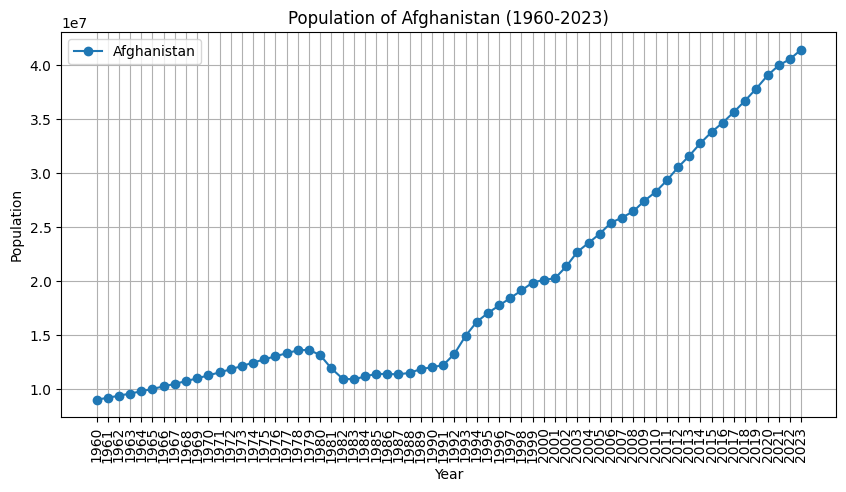

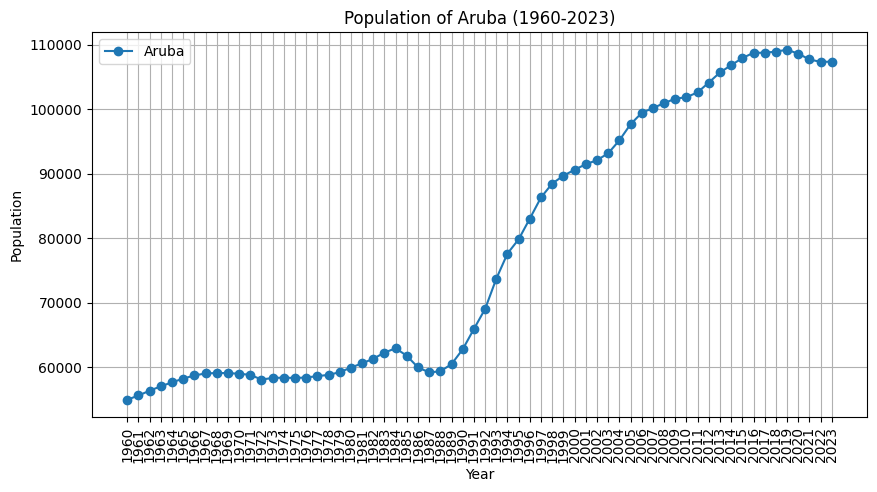

In [6]:
# Function to plot population trends for a specific country
def plot_population_trend(country_name):
    country_data = df[df['Country Name'] == country_name].iloc[:, 4:].values.flatten()
    years = df.columns[4:]
    plt.figure(figsize=(10, 5))
    plt.plot(years, country_data, marker='o', label=country_name)
    plt.title(f'Population of {country_name} (1960-2023)')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid()
    plt.show()

# Plot population trends for Afghanistan and Aruba
plot_population_trend('Afghanistan')
plot_population_trend('Aruba')

### Population Comparison Across Countries
To compare the populations of specific countries in a given year (e.g., 2023), we can use a bar chart. This helps us visualize which countries have the largest or smallest populations.

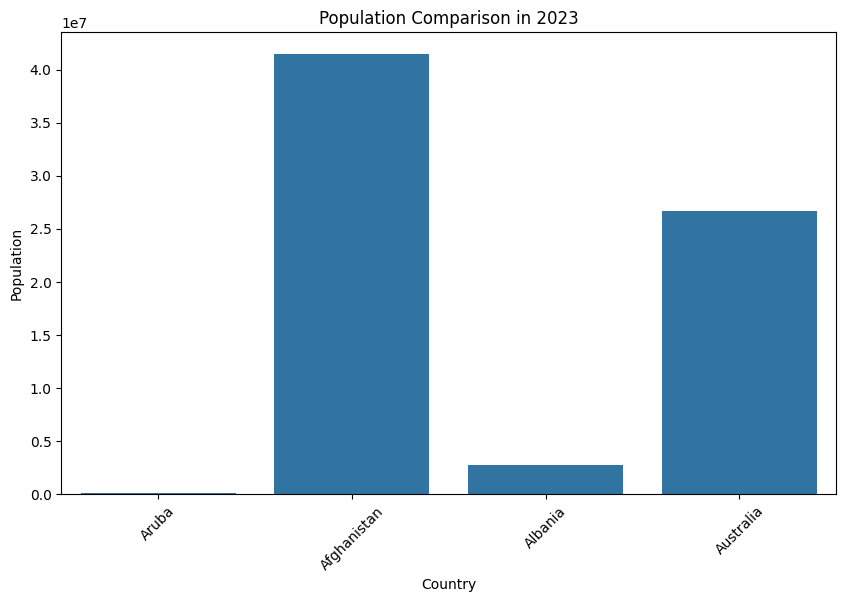

In [16]:
# Select a few countries for comparison
countries = ['Afghanistan', 'Aruba', 'Albania', 'Australia']
population_2023 = df[df['Country Name'].isin(countries)][['Country Name', '2023']]

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Country Name', y='2023', data=population_2023)
plt.title('Population Comparison in 2023')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

### Distribution of Population Growth Rates
To understand how population growth rates vary across countries, we can create a histogram. This shows the frequency of different growth rates in a specific year (e.g., 2023).

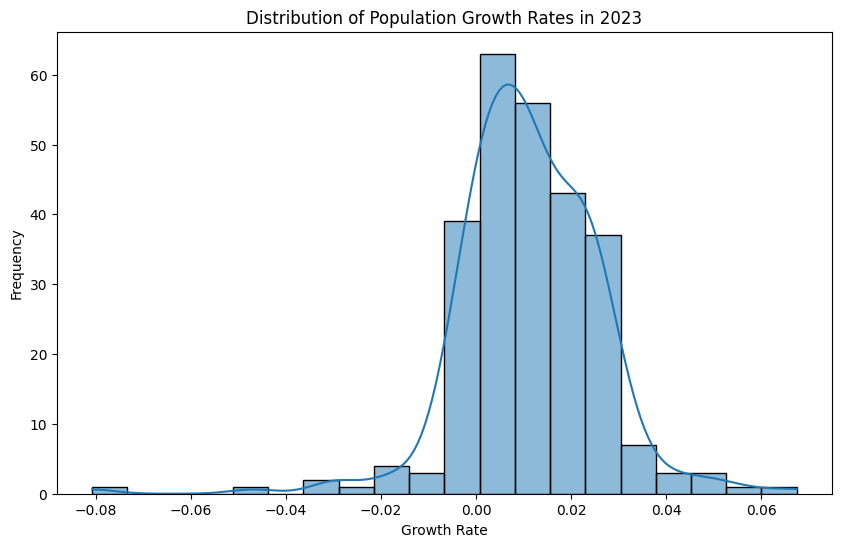

In [17]:
# Calculate growth rates for 2023
df['Growth Rate 2023'] = (df['2023'] - df['2022']) / df['2022']

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Growth Rate 2023'].dropna(), bins=20, kde=True)
plt.title('Distribution of Population Growth Rates in 2023')
plt.xlabel('Growth Rate')
plt.ylabel('Frequency')
plt.show()

### Regional Comparisons
Next, let's compare population trends across regions (e.g., Africa, Europe, Asia).

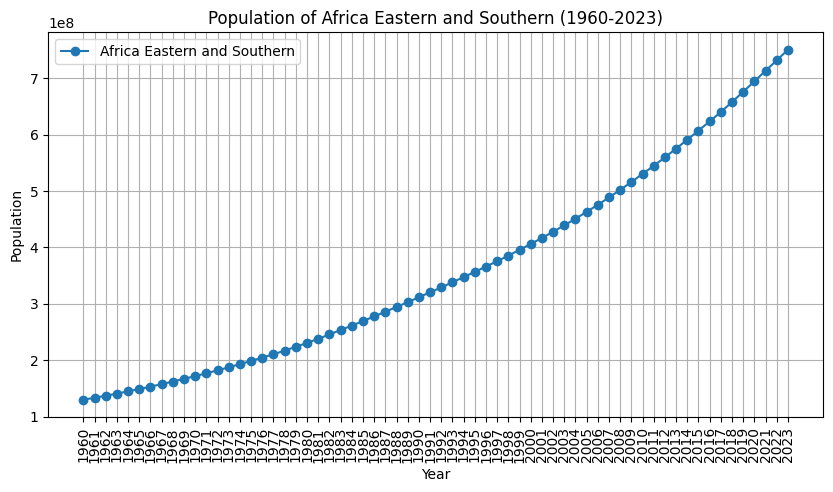

In [7]:
# Aggregate data by region (example: Africa Eastern and Southern)
region_data = df[df['Country Name'] == 'Africa Eastern and Southern'].iloc[:, 4:].values.flatten()
years = df.columns[4:]

plt.figure(figsize=(10, 5))
plt.plot(years, region_data, marker='o', label='Africa Eastern and Southern')
plt.title('Population of Africa Eastern and Southern (1960-2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

### Growth Rates
Let's calculate annual population growth rates for each country/region.

In [8]:
# Calculate growth rates
df_growth = df.copy()
for i in range(5, len(df.columns)):
    df_growth[f'Growth Rate {df.columns[i-1]}'] = (df.iloc[:, i] - df.iloc[:, i-1]) / df.iloc[:, i-1]

# Display growth rates for Afghanistan
afghanistan_growth = df_growth[df_growth['Country Name'] == 'Afghanistan'].iloc[:, -10:]
print("Annual Growth Rates for Afghanistan:")
print(afghanistan_growth)

Annual Growth Rates for Afghanistan:
   Growth Rate 2013  Growth Rate 2014  Growth Rate 2015  Growth Rate 2016  \
2          0.036993          0.031691          0.025681          0.028481   

   Growth Rate 2017  Growth Rate 2018  Growth Rate 2019  Growth Rate 2020  \
2          0.029536          0.030294          0.032039          0.023841   

   Growth Rate 2021  Growth Rate 2022  
2          0.014461          0.021586  


## Advanced Analysis
Now, let's dig deeper into the data to uncover more insights.

### Clustering
I'll group countries with similar population trends using K-means clustering.

In [10]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 2.6 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/11.1 MB 3.9 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.1 MB 4.5 MB/s eta 0:00:02
   ----------------- ---------------------- 5.0/11.1 MB 4.9 MB/s eta 0:00:02
   ---------------------- ----------------- 6.3/11.1 MB 5.1 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 5.4 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 5.5 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.1 MB 5.5 MB/s eta 0:00:01
   --------------------------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


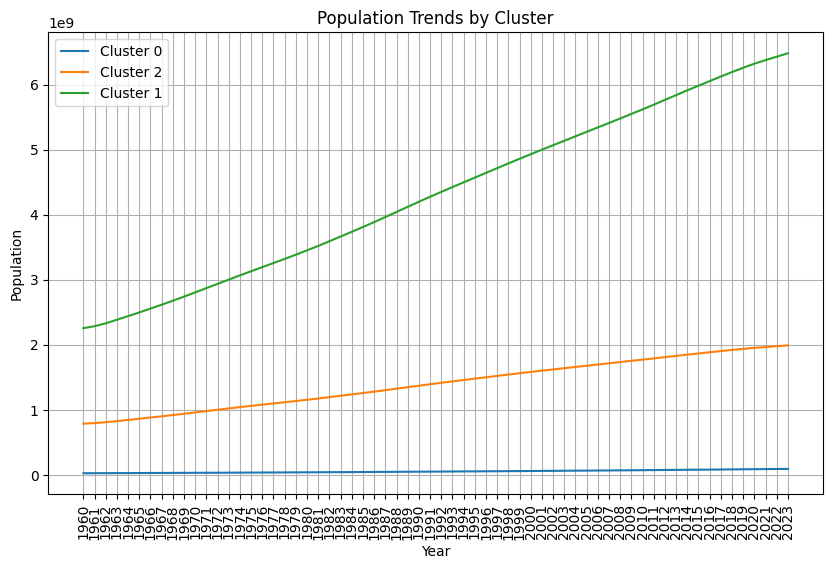

In [11]:
from sklearn.cluster import KMeans

# Prepare data for clustering
cluster_data = df.iloc[:, 4:].fillna(0)  # Fill missing values with 0

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_data)

# Visualize clusters
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster].iloc[:, 4:-1].mean()
    plt.plot(cluster_data.index, cluster_data.values, label=f'Cluster {cluster}')
plt.title('Population Trends by Cluster')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

### Forecasting
Let's predict future population trends for a specific country using a simple linear model.

In [14]:
# Extract Afghanistan data
afghanistan_data = df[df['Country Name'] == 'Afghanistan'].iloc[:, 4:].values.flatten()

# Check the length of afghanistan_data
print("Length of afghanistan_data:", len(afghanistan_data))
print("Length of years:", len(years))

Length of afghanistan_data: 65
Length of years: 64


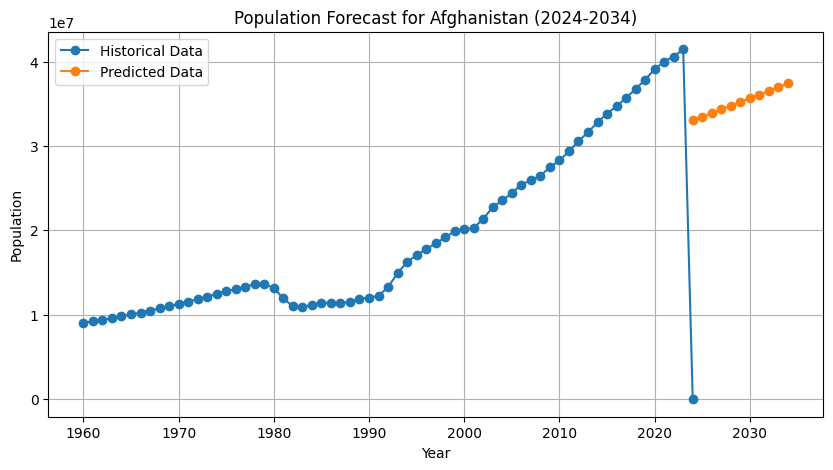

In [15]:
from sklearn.linear_model import LinearRegression

# Extract Afghanistan data
afghanistan_data = df[df['Country Name'] == 'Afghanistan'].iloc[:, 4:].values.flatten()

# Adjust years array based on the length of afghanistan_data
if len(afghanistan_data) == 65:  # 1960 to 2024
    years = np.arange(1960, 2025).reshape(-1, 1)
else:  # 1960 to 2023
    years = np.arange(1960, 2024).reshape(-1, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(years, afghanistan_data)

# Predict future population
future_years = np.arange(2024, 2035).reshape(-1, 1)
future_population = model.predict(future_years)

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(years, afghanistan_data, marker='o', label='Historical Data')
plt.plot(future_years, future_population, marker='o', label='Predicted Data')
plt.title('Population Forecast for Afghanistan (2024-2034)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid()
plt.show()

## Insights and Recommendations
Based on our analysis, here are the key insights and recommendations:
- **Insight 1**: Rapid population growth in regions like Africa requires investments in infrastructure and healthcare.
- **Insight 2**: Countries with declining populations (e.g., some European nations) may need policies to address aging populations.
- **Recommendation 1**: Governments should use population forecasts to plan resource allocation.
- **Recommendation 2**: Businesses can target high-growth regions for market expansion.

## Conclusion
In this project, I analyzed global population trends to uncover patterns and provide actionable insights. By understanding these trends, stakeholders can make informed decisions to address challenges and leverage opportunities.